<a href="https://colab.research.google.com/github/NonaHelmi/SC/blob/main/antcolony_Salesman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install numpy matplotlib


Best path: [0, 1, 2, 3, 0]
Best distance: 22


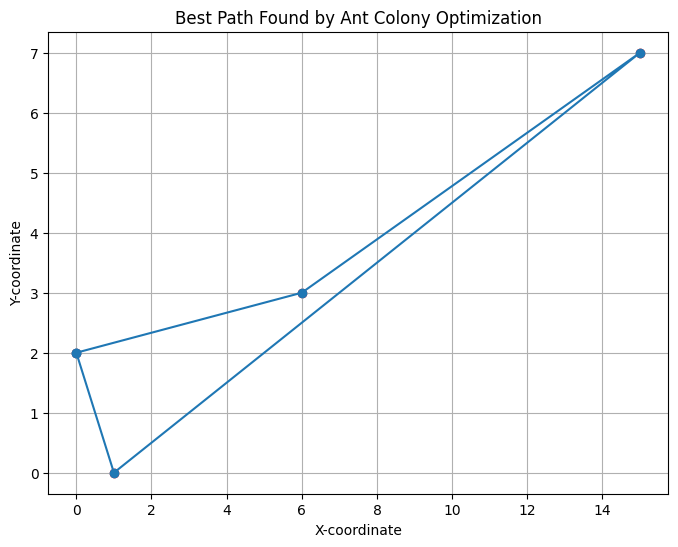

In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt

class AntColonyOptimizer:
    def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
        self.distances = distances  # ماتریس فاصله بین شهرها
        self.n_ants = n_ants  # تعداد مورچه‌ها
        self.n_best = n_best  # بهترین مورچه‌ها برای به‌روزرسانی فیرومون
        self.n_iterations = n_iterations  # تعداد تکرارها
        self.decay = decay  # میزان افت فیرومون
        self.alpha = alpha  # وزن فیرومون
        self.beta = beta  # وزن فاصله
        self.pheromone = np.ones(self.distances.shape)  # فیرومون اولیه

    def run(self):
        shortest_path = None
        shortest_distance = float('inf')

        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, shortest_path, shortest_distance)
            self.pheromone *=(1-self.decay)  # کاهش فیرومون در هر تکرار

            # پیدا کردن بهترین مسیر در این تکرار
            for path in all_paths:
                distance = self.path_distance(path)
                if distance < shortest_distance:
                    shortest_distance = distance
                    shortest_path = path

        return shortest_path, shortest_distance

    def gen_all_paths(self):
        all_paths = []
        for _ in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append(path)
        return all_paths

    def gen_path(self, start):
        path = [start]
        visited = set(path)

        while len(visited) < len(self.distances):
            next_city = self.pick_next_city(path[-1], visited)
            path.append(next_city)
            visited.add(next_city)

        path.append(start)  # برگرداندن به شهر شروع
        return path

    def pick_next_city(self, current_city, visited):
        pheromone = self.pheromone[current_city]
        visibility = 1.0 / (self.distances[current_city] + 1e-10)  # جلوگیری از تقسیم بر صفر
        weights = pheromone ** self.alpha * visibility ** self.beta
        weights[list(visited)] = 0  # جلوگیری از بازدید دوباره

        if weights.sum() == 0:
            return random.choice(list(set(range(len(self.distances))) - visited))

        next_city = np.random.choice(range(len(weights)), p=weights/weights.sum())
        return next_city

    def spread_pheronome(self, all_paths, shortest_path, shortest_distance):
        for path in all_paths:
            distance = self.path_distance(path)
            # به‌روزرسانی فیرومون برای بهترین مسیر
            if path == shortest_path:
                for from_city, to_city in zip(path[:-1], path[1:]):
                    self.pheromone[from_city][to_city] += 1.0 / distance
                    self.pheromone[to_city][from_city] += 1.0 / distance

    def path_distance(self, path):
        distance = 0
        for from_city, to_city in zip(path[:-1], path[1:]):
            distance += self.distances[from_city][to_city]
        return distance

# تست الگوریتم
if __name__ == "__main__":
    # مسافت بین شهرها (مثال)
    distances = np.array([[0, 2, 9, 10],
                          [1, 0, 6, 4],
                          [15, 7, 0, 8],
                          [6, 3, 12, 0]])

    # پارامترهای الگوریتم
    n_ants = 10
    n_best = 5
    n_iterations = 100
    decay = 0.95
    alpha = 1
    beta = 2

    # اجرای الگوریتم
    aco = AntColonyOptimizer(distances, n_ants, n_best, n_iterations, decay, alpha, beta)
    best_path, best_distance = aco.run()

    print("Best path:", best_path)
    print("Best distance:", best_distance)

    # ترسیم بهترین مسیر
    plt.figure(figsize=(8, 6))
    plt.scatter(distances[:, 0], distances[:, 1], c='red')
    x_path = [distances[i][0] for i in best_path]
    y_path = [distances[i][1] for i in best_path]
    plt.plot(x_path, y_path, marker='o')
    plt.title("Best Path Found by Ant Colony Optimization")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.grid()
    plt.show()